<a href="https://colab.research.google.com/github/OCR-tech/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn-video1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

In [1]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [2]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [4]:
# 1. Get the data ready
import pandas as pd
# heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [7]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.85+-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.6.1
          pip: 24.1.2
   setuptools: 75.1.0
        numpy: 1.26.4
        scipy: 1.13.1
       Cython: 3.0.12
       pandas: 2.2.2
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.5.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.11/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
        version: 0.3.23.dev
threading_layer: pthreads
   architecture: Haswell

       user_api: blas
   internal_api: openblas
    num_threads: 2
         prefix: libopenblas
       filepath: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
        version: 0.3.27
threading_layer: pthreads
   architecture: Haswell

       use

In [8]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)        ### clf = classifier



# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [9]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
218,65,1,0,135,254,0,0,127,0,2.8,1,1,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2


In [12]:
X_train.shape, X_train.dtypes

((242, 13),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 dtype: object)

In [13]:
X_train.ndim

2

In [14]:
y_train, y_train.shape

(68     1
 23     1
 156    1
 254    0
 281    0
       ..
 256    0
 218    0
 230    0
 13     1
 27     1
 Name: target, Length: 242, dtype: int64,
 (242,))

In [15]:
# make a prediction
# y_label = clf.predict(np.array([0, 2, 3, 4]))

In [16]:
y_preds = clf.predict(X_test)     ### classifier
y_preds

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [17]:
y_test

,target
76,1
48,1
47,1
259,0
251,0
...,...
252,0
62,1
159,1
153,1


In [18]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [19]:
clf.score(X_test, y_test)

0.8688524590163934

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.88        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [21]:
confusion_matrix(y_test, y_preds)

array([[25,  6],
       [ 2, 28]])

In [22]:
accuracy_score(y_test, y_preds)

0.8688524590163934

In [23]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 86.89%

Trying model with 30 estimators...
Model accuracy on test set: 85.25%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 88.52%

Trying model with 60 estimators...
Model accuracy on test set: 86.89%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



In [24]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [25]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8688524590163934

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y = heart_disease["target"]
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [29]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [31]:
X.shape[0] * 0.8

242.4

In [32]:
242 + 61

303

In [33]:
len(heart_disease)

303

### 1.1 Make sure it's all numerical

In [34]:
# car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [35]:
len(car_sales)

1000

In [36]:
car_sales.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,int64


In [37]:
car_sales["Doors"].value_counts()

,count
Doors,
4,856
5,79
3,65


In [38]:
len(car_sales)

1000

In [39]:
car_sales.dtypes

,0
Make,object
Colour,object
Odometer (KM),int64
Doors,int64
Price,int64


In [40]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]


# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)
X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White          35431      4
 1       BMW   Blue         192714      5
 2     Honda  White          84714      4
 3    Toyota  White         154365      4
 4    Nissan   Blue         181577      3
 ..      ...    ...            ...    ...
 995  Toyota  Black          35820      4
 996  Nissan  White         155144      3
 997  Nissan   Blue          66604      4
 998   Honda  White         215883      4
 999  Toyota   Blue         248360      4
 
 [1000 rows x 4 columns],
 0      15323
 1      19943
 2      28343
 3      13434
 4      14043
        ...  
 995    32042
 996     5716
 997    31570
 998     4001
 999    12732
 Name: Price, Length: 1000, dtype: int64)

In [41]:
X_train, X_test

(       Make Colour  Odometer (KM)  Doors
 303  Toyota  White         134862      4
 910  Nissan  White          40598      4
 405     BMW   Blue         142189      3
 432  Toyota  White         149989      4
 43   Toyota   Blue         141617      4
 ..      ...    ...            ...    ...
 326  Toyota   Blue         232912      4
 510  Toyota  Green         118706      4
 656  Toyota   Blue          63501      4
 499  Nissan  White          82429      4
 341  Toyota  White         119439      4
 
 [800 rows x 4 columns],
        Make Colour  Odometer (KM)  Doors
 21    Honda   Blue          30615      4
 574  Toyota  White          53531      4
 352   Honda    Red          47933      4
 353  Toyota  White          50756      4
 514  Nissan  White         152215      4
 ..      ...    ...            ...    ...
 207  Nissan  Black         125251      4
 561  Toyota  Green          58938      4
 244   Honda    Red         164352      4
 56    Honda  White          82039      4
 73   T

In [42]:
y_train, y_test

(303    12353
 910    24122
 405    23336
 432     5260
 43     19085
        ...  
 326     6029
 510    20705
 656    15260
 499     8979
 341    17340
 Name: Price, Length: 800, dtype: int64,
 21     29653
 574     7802
 352    10301
 353    11738
 514    16519
        ...  
 207    18306
 561     6602
 244    14160
 56     15662
 73     12001
 Name: Price, Length: 200, dtype: int64)

In [43]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [44]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()     # n_estimators=100
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [45]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [46]:
car_sales["Doors"].value_counts()

,count
Doors,
4,856
5,79
3,65


In [47]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [48]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [49]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [50]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [51]:
# Another way to do it with pd.dummies...
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [52]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)


model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [54]:
model.score(X_test, y_test)

0.3235867221569877

In [55]:
print(sklearn.__version__)

1.6.1


### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [56]:
# Import car sales missing data
# car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [58]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [59]:
X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [1000 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 1000, dtype: float64)

In [60]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [61]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [62]:
car_sales_missing["Doors"].value_counts()

,count
Doors,
4.0,811
5.0,75
3.0,64


#### Option 1: Fill missing data with Pandas

In [63]:
car_sales_missing["Doors"].value_counts()

,count
Doors,
4.0,811
5.0,75
3.0,64


In [64]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

<ipython-input-64-19565e4e44d6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
<ipython-input-64-19565e4e44d6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [65]:
# Check our dataframe again
car_sales_missing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,50


In [66]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [67]:
car_sales_missing.isna().sum()

,0
Make,0
Colour,0
Odometer (KM),0
Doors,0
Price,0


In [68]:
len(car_sales_missing)

950

In [69]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [70]:
X, y

(        Make Colour  Odometer (KM)  Doors
 0      Honda  White        35431.0    4.0
 1        BMW   Blue       192714.0    5.0
 2      Honda  White        84714.0    4.0
 3     Toyota  White       154365.0    4.0
 4     Nissan   Blue       181577.0    3.0
 ..       ...    ...            ...    ...
 995   Toyota  Black        35820.0    4.0
 996  missing  White       155144.0    3.0
 997   Nissan   Blue        66604.0    4.0
 998    Honda  White       215883.0    4.0
 999   Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [71]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Filling missing data and transforming categorical data with Scikit-Learn

**Note:** This section is different to the video. The video shows filling and transforming the entire dataset (`X`) and although the techniques are correct, it's best to fill and transform training and test sets separately (as shown in the code below).

The main takeaways:
- Split your data first (into train/test)
- Fill/transform the training set and test sets separately

Thank you Robert [for pointing this out](https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/#questions/9506426).

In [72]:
# car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")

car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [73]:
car_sales_missing.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


In [74]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47
Price,0


In [75]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 4), (190, 4), (760,), (190,))

In [77]:
# Check missing values
X.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47


In [78]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [79]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

,0
Make,0
Colour,0
Doors,0
Odometer (KM),0


In [80]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

,0
Make,47
Colour,46
Odometer (KM),48
Doors,47
Price,0


In [81]:
# Now let's one hot encode the features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [82]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model = RandomForestRegressor(n_estimators=10)
model = RandomForestRegressor(n_estimators=100)

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

In [83]:
len(car_sales_missing), len(car_sales)

(950, 1000)

In [84]:
# Check length of transformed data (filled and one-hot encoded)
# vs. length of original data
len(transformed_X_train.toarray())+len(transformed_X_test.toarray()), len(car_sales)

(950, 1000)

**Note:** The 50 less values in the transformed data is because we dropped the rows (50 total) with missing values in the Price column.

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    
* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart disease or not)
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [85]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [86]:
housing_df = pd.DataFrame(housing["data"])
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [87]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [88]:
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [89]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [90]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

In [91]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [92]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440126

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [94]:
model

Ridge()

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)?

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

In [95]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8066196804802649

## 2.2 Picking a machine learning model for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [96]:
# Get the data (be sure to click "raw") - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/heart-disease.csv

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [97]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`.

In [98]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [99]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


In [100]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
# clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble methods (table)
    2. If you have unstructured data, use deep learning or transfer learning (image, text, audio)

In [101]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [102]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

In [103]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [104]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [105]:
y.tail()

,target
298,0
299,0
300,0
301,0
302,0


In [106]:
len(X), len(y)

(303, 303)

In [107]:
X.shape, y.shape

((303, 13), (303,))

### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forest Wikipedia (simple version)](https://simple.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### 3.2 Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [108]:
# Use a trained model to make predictions
# clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work...

In [109]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [110]:
X_test.shape

(61, 13)

In [111]:
clf.predict(np.array(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [112]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [113]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [114]:
np.array(y_test)    ### same format with input (X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [115]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [116]:
clf.score(X_test, y_test)

0.8524590163934426

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()` - use this if someone asks you "what's the probability your model is assigning to each prediction?"

In [118]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [119]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [120]:
# 0.89 + 0.11 (0) // 0.49 + 0.51 (1) // 0.43 + 0.57 (1) // 0.84 + 0.16 (0) // 0.18 + 0.82 (1)

In [121]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [122]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [123]:
heart_disease["target"].value_counts()

,count
target,
1,165
0,138


`predict()` can also be used for regression models.

In [124]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [126]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [127]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [129]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [130]:
y_test[:10]

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
13311,1.58700
7113,1.98200
7668,1.57500
18246,3.40000
5723,4.46600


In [131]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [132]:
len(y_preds), len(y_test)

(4128, 4128)

In [133]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

In [134]:
housing_df["target"]

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [135]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [136]:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=1)
# clf = RandomForestClassifier(n_estimators=10)
clf = RandomForestClassifier(n_estimators=100)
# clf = RandomForestClassifier(n_estimators=1000)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(X_train, y_train)

1.0

In [138]:
clf.score(X_test, y_test)             # not seen data before

0.8524590163934426

Let's use the `score()` on our regression problem...

In [139]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance
# model = RandomForestRegressor(n_estimators=1)
# model = RandomForestRegressor(n_estimators=10)
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [140]:
model.score(X_train, y_train)

0.9736828565983116

In [141]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

In [142]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 4.2 Evaluating a model using the `scoring` parameter

In [143]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train);

In [144]:
clf.score(X_test, y_test)

0.8524590163934426

In [145]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [146]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [147]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [148]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X_test, y_test)

0.8524590163934426

In [149]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [150]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [151]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [152]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [153]:
np.mean(cross_val_score)

0.8248087431693989

In [154]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [155]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [157]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [158]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [159]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [160]:
thresholds

array([ inf, 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])

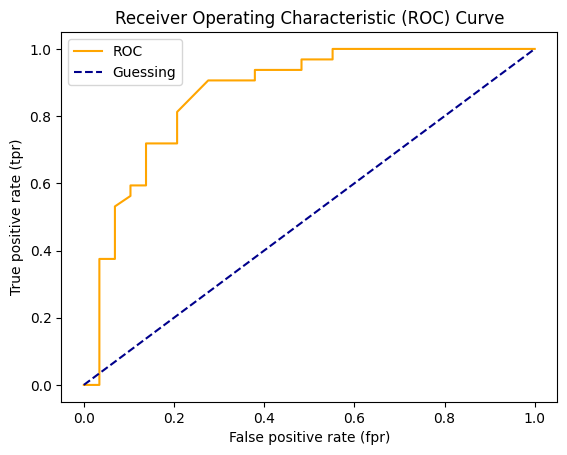

In [161]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1.0], [0, 1.0], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [162]:
y_test

,target
110,1
40,1
31,1
101,1
86,1
...,...
37,1
300,0
162,1
284,0


In [163]:
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [164]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

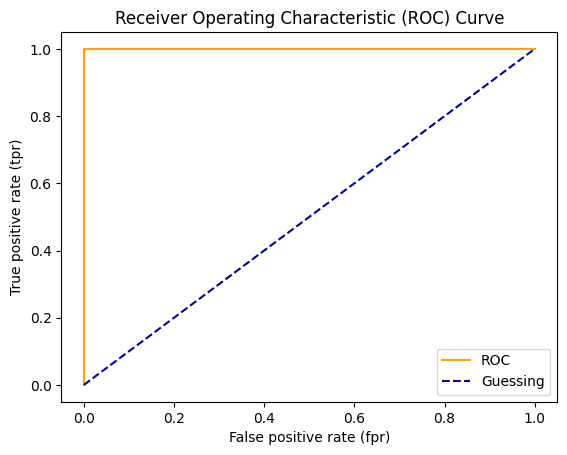

In [165]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [166]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

#### Confusion matrix
The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [167]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

Again, this is probably easier visualized.

One way to do it is with `pd.crosstab()`.

In [168]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


In [169]:
23 + 4 + 7 + 27

61

In [170]:
len(X_test)

61

In [171]:
len(y_preds), len(y_test)

(61, 61)

<Axes: >

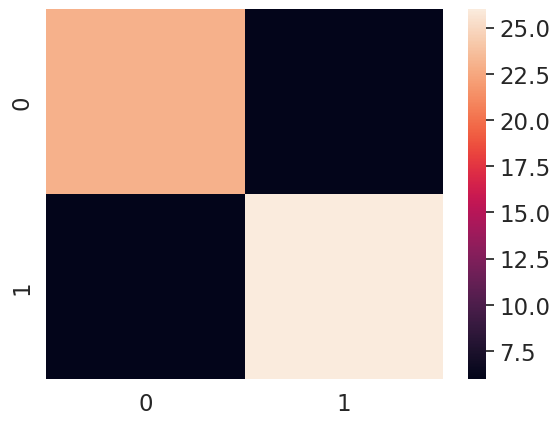

In [172]:
import seaborn as sns

sns.set(font_scale=1.5)
conf_mat = confusion_matrix(y_test, y_preds)
# fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat)

#### Creating a confusion matrix using Scikit-Learn

Scikit-Learn has multiple different implementations of plotting confusion matrices:

1. [`sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator) - this takes a fitted estimator (like our `clf` model), features (`X`) and labels (`y`), it then uses the trained estimator to make predictions on `X` and compares the predictions to `y` by displaying a confusion matrix.
2. [`sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

> **Note:** Both of these methods/classes require Scikit-Learn 1.0+. To check your version of Scikit-Learn run:
```python
import sklearn
sklearn.__version__
```
> If you don't have 1.0+, you can upgrade at: https://scikit-learn.org/stable/install.html

In [173]:
import sklearn
sklearn.__version__

'1.6.1'

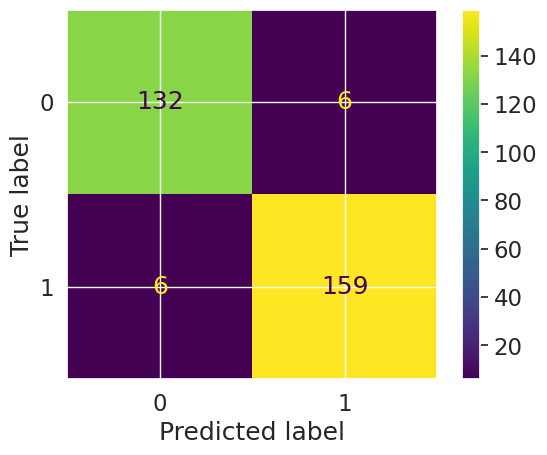

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

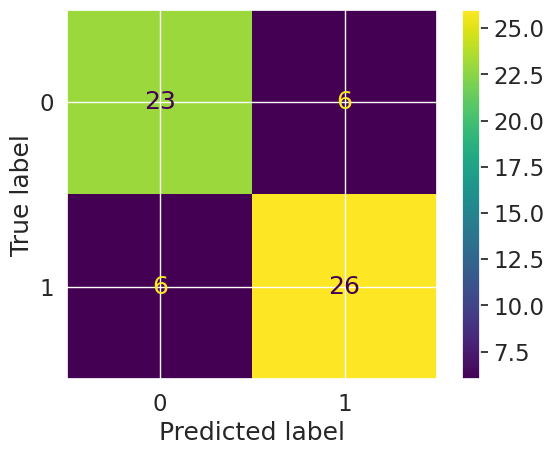

In [175]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_preds);

**Classification Report**

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [177]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
    
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1.  For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [178]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [179]:
model.score(X_test, y_test)

0.8066196804802649

In [180]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [181]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [182]:
y_test.mean()

2.0550030959302323

In [183]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [184]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [185]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [186]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.

In [187]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [188]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [189]:
y_test

,target
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000
...,...
15362,2.63300
16623,2.66800
18086,5.00001
2144,0.72300


In [190]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [191]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.

In [192]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [193]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [194]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

0.2534073069137548

In [246]:
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [243]:
df_large_error = df.copy()

In [244]:
df_large_error.iloc[0]["squared_differences"] = 16

<ipython-input-244-696d49eb07f3>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [245]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16        # increase "squared_differences" for 1 sample

<ipython-input-245-d98961fa9689>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16        # increase "squared_differences" for 1 sample


In [247]:
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [248]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [250]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.25728320720794084

In [254]:
# # Artificially increase error in "squared_differences" column for ~100 samples
# df_large_error.iloc[1:100] = 20
# df_large_error

In [252]:
# Artificially increase error in "squared_differences" column for ~100 samples
df_large_error.iloc[1:100, 3] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,20.000000
15663,5.00001,4.928596,-0.071414,20.000000
20484,2.18600,2.540290,0.354290,20.000000
9814,2.78000,2.331760,-0.448240,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [201]:
# Calculate MSE with large error(s)
df_large_error["squared_differences"].mean()

0.7333540351264799

### 4.2.3 Finally using the `scoring` parameter

In [257]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier       ### Classifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


# clf = RandomForestClassifier(n_estimators=1)
# clf = RandomForestClassifier(n_estimators=10)
clf = RandomForestClassifier(n_estimators=100)

In [258]:
X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [259]:
clf

RandomForestClassifier()

In [260]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [261]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [262]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")         ### accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [263]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [265]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")         ### precision
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [266]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [267]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")         ### recall
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [268]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see the `scoring` parameter being using for a regression problem...

In [273]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor             ### Regression

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [274]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

0.6545756342466266

In [277]:
model.fit(X, y)

RandomForestRegressor()

In [278]:
model.score(X, y)

0.9742032296436292

In [213]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [279]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.42931712134356587

In [280]:
cv_mse

array([-0.51145269, -0.34842423, -0.37783894, -0.44384707, -0.46502267])

In [281]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4634676564970931

In [282]:
cv_mae

array([-0.5381511 , -0.40534701, -0.43932542, -0.46019836, -0.47431639])

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      # cv = 0

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [219]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      # cv = 0

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [283]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [285]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [286]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.

In [290]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [291]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [299]:
# train_test_split(X, y, test_size=0.2)

In [319]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)



# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]


# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled))                    # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))     # 15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]
# X_test, y_test = X[valid_split:], y[:valid_split]




clf = RandomForestClassifier()
# clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [320]:
X_train.shape, X_valid.shape, X_test.shape

((212, 13), (45, 13), (46, 13))

In [321]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [325]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=10)              # n_estimators=10
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classsifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [327]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)              # n_estimators=10
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evalute the 2nd classsifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 91.11%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [328]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}




np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,                      # RandomizedSearchCV
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,                               # cv = 5
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [332]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [333]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [334]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [337]:
6*5*2*3*3*5

2700

In [342]:
grid_2 = {'n_estimators': [100, 200, 500],      # from   rs_clf.best_params_
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [341]:
3*1*2*1*2*5

60

In [232]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

In [343]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [345]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Let's compare our different models metrics.

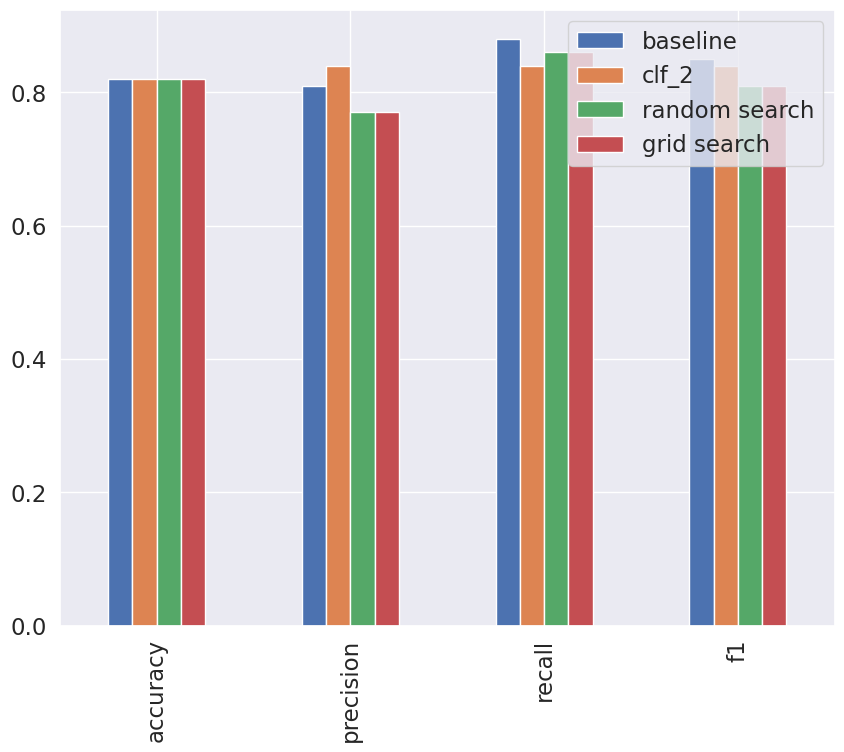

In [235]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [346]:
import pickle

# Save an extisting model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [350]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [358]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

In [359]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


**Joblib**

In [352]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [353]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [354]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together!

In [355]:
# data = pd.read_csv("data/car-sales-extended-missing-data.csv")


data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")


data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [356]:
data.dtypes

,0
Make,object
Colour,object
Odometer (KM),float64
Doors,float64
Price,float64


In [357]:
data.isna().sum()

,0
Make,49
Colour,50
Odometer (KM),50
Doors,50
Price,50


Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [361]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV




# Setup random seed
import numpy as np
np.random.seed(42)





# Import data and drop rows with missing labels
# data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")


data.dropna(subset=["Price"], inplace=True)





# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])



door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])



numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])




# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("num", numeric_transformer, numeric_features)
                    ])




# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])




# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSesrchCV` with our `Pipeline`.

In [363]:
X_train

,Make,Colour,Odometer (KM),Doors
986,Honda,White,71934.0,4.0
297,Toyota,Red,162665.0,4.0
566,Honda,White,42844.0,4.0
282,Honda,White,195829.0,4.0
109,Honda,Blue,219217.0,4.0
...,...,...,...,...
106,Toyota,NaN,218803.0,4.0
277,BMW,Blue,245427.0,5.0
904,Toyota,White,196225.0,4.0
450,Honda,Blue,133117.0,NaN


In [364]:
y_train

,Price
986,26882.0
297,7042.0
566,29145.0
282,17866.0
109,4747.0
...,...
106,13283.0
277,17520.0
904,19812.0
450,10344.0


In [366]:
pipe_grid

{'preprocessor__num__imputer__strategy': ['mean', 'median'],
 'model__n_estimators': [100, 1000],
 'model__max_depth': [None, 5],
 'model__max_features': ['auto'],
 'model__min_samples_split': [2, 4]}

In [367]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Odometer (KM)'])])),
                ('model', RandomForestRegressor())])

In [382]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    # "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [380]:
# gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.


In [383]:
gs_model.score(X_test, y_test)

0.2848784564026805

In [384]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']